# **Задание 1 - по тетрадке sem01_autograd**.

1. Добавить Bias и посчитать для них градиенты.
2. Сравнить градиенты с тем, как считает PyTorch AutoGrad.

In [1]:
import numpy as np
import torch

In [2]:
batch_size = 64
input_size = 3
hidden_size = 2
output_size = 1

In [3]:
N = 100
D_in = 50

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

x = np.random.randn(N, D_in)
x_torch = torch.randn(N, D_in, device=device, dtype=dtype)

In [4]:
# Create random input and output data
x = torch.randn(batch_size, input_size, device=device, dtype=dtype)
y = torch.randn(batch_size, output_size, device=device, dtype=dtype)


# Randomly initialize weights
w1 = torch.randn(input_size, hidden_size, device=device, dtype=dtype)
w2 = torch.randn(hidden_size + 1, output_size, device=device, dtype=dtype)

#bias
b1 = torch.ones(batch_size)
mask_bias = torch.from_numpy(np.array([False] * batch_size))

In [5]:
def nn(x, y):
  # Randomly initialize weights
  w1 = torch.randn(input_size, hidden_size, device=device, dtype=dtype)
  w2 = torch.randn(hidden_size, output_size, device=device, dtype=dtype)

  learning_rate = 1e-3
  for t in range(10000):
      # Forward pass: compute predicted y
      h = x.mm(w1)
      h_relu = h.clamp(min=0)
      y_pred = h_relu.mm(w2)

      # Compute and print loss
      loss = (y_pred - y).pow(2).sum()
      # print(t, loss)

      # Backward pass:
      grad_y_pred = 2.0 * (y_pred - y)
      grad_w2 = h_relu.t().mm(grad_y_pred)
      grad_h_relu = grad_y_pred.mm(w2.t())
      grad_h = grad_h_relu.clone()
      grad_h[h<0] = 0
      grad_w1 = x.t().mm(grad_h)

      w1 -= (learning_rate * grad_w1)
      w2 -= learning_rate * grad_w2
      if t % 100 == 99:
          print(f'Loss on iteration {t} = {loss}')


In [6]:
def nn_bias(x, y):
  # Randomly initialize weights
  w1 = torch.randn(input_size, hidden_size, device=device, dtype=dtype)
  w2 = torch.randn(hidden_size + 1, output_size, device=device, dtype=dtype)

  # bias
  b1 = torch.ones(batch_size)
  mask_bias = torch.from_numpy(np.array([False] * batch_size))
  learning_rate = 1e-3

  for t in range(10000):
      # Forward pass: compute predicted y
      h = x.mm(w1)
      h_relu = h.clamp(min=0)
      h_bias = torch.cat((h_relu, b1.unsqueeze(1)), dim=-1)
      y_pred = h_bias.mm(w2)

      # Compute and print loss
      loss = (y_pred - y).pow(2).sum()
      # print(t, loss)

      # Backward pass:
      grad_y_pred = 2.0 * (y_pred - y)
      grad_w2 = h_bias.t().mm(grad_y_pred)
      grad_h_relu = grad_y_pred.mm(w2.t())
      grad_h = grad_h_relu.clone()
      mask = torch.cat((h<0, mask_bias.unsqueeze(1)), dim=-1)
      grad_h[mask] = 0
      grad_w1 = x.t().mm(grad_h)

      w1 -= (learning_rate * grad_w1)[:,:2]
      w2 -= learning_rate * grad_w2
      if t % 100 == 99:
          print(f'Loss on iteration {t} = {loss}')


In [7]:
nn(x, y)

Loss on iteration 99 = 45.40827941894531
Loss on iteration 199 = 45.32851791381836
Loss on iteration 299 = 45.223876953125
Loss on iteration 399 = 45.096187591552734
Loss on iteration 499 = 44.850379943847656
Loss on iteration 599 = 44.62159729003906
Loss on iteration 699 = 44.44300842285156
Loss on iteration 799 = 44.37883758544922
Loss on iteration 899 = 44.322635650634766
Loss on iteration 999 = 44.29022979736328
Loss on iteration 1099 = 44.25944900512695
Loss on iteration 1199 = 44.22908020019531
Loss on iteration 1299 = 44.185691833496094
Loss on iteration 1399 = 44.144798278808594
Loss on iteration 1499 = 44.1109733581543
Loss on iteration 1599 = 44.07970428466797
Loss on iteration 1699 = 44.04426956176758
Loss on iteration 1799 = 43.997188568115234
Loss on iteration 1899 = 43.9503059387207
Loss on iteration 1999 = 43.905033111572266
Loss on iteration 2099 = 43.861270904541016
Loss on iteration 2199 = 43.825992584228516
Loss on iteration 2299 = 43.78577423095703
Loss on iteration

In [8]:
nn_bias(x, y)

Loss on iteration 99 = 42.891605377197266
Loss on iteration 199 = 42.08427810668945
Loss on iteration 299 = 40.751548767089844
Loss on iteration 399 = 40.33993911743164
Loss on iteration 499 = 40.09145736694336
Loss on iteration 599 = 40.05274200439453
Loss on iteration 699 = 40.040367126464844
Loss on iteration 799 = 40.04511260986328
Loss on iteration 899 = 40.04072189331055
Loss on iteration 999 = 40.04015350341797
Loss on iteration 1099 = 40.04281234741211
Loss on iteration 1199 = 40.045780181884766
Loss on iteration 1299 = 40.04747772216797
Loss on iteration 1399 = 40.04037857055664
Loss on iteration 1499 = 40.04269790649414
Loss on iteration 1599 = 40.045448303222656
Loss on iteration 1699 = 40.048709869384766
Loss on iteration 1799 = 40.03986358642578
Loss on iteration 1899 = 40.04246520996094
Loss on iteration 1999 = 40.0453987121582
Loss on iteration 2099 = 40.048797607421875
Loss on iteration 2199 = 40.04019546508789
Loss on iteration 2299 = 40.04278564453125
Loss on iteratio

# **Задание 2.**

Ну что ж, пришло время построить свою первую нейронную сеть.

У нас будет искуственная задачка, и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
df = pd.read_csv('data.csv',index_col=0)

In [11]:
df.head()

x1        x2  y
0 -4.626272 -6.658988  0
1 -7.789640  0.262519  0
2 -8.739678  1.537758  0
3 -2.546441 -7.705224  0
4 -2.751506 -7.940187  0

## **Визуализация данных**

Как и в любой задаче машинного обучения, для начала надо визуализировать данные.
Не зря же нашу нейронную сеть мы так долго учим?


<Axes: xlabel='x1', ylabel='x2'>

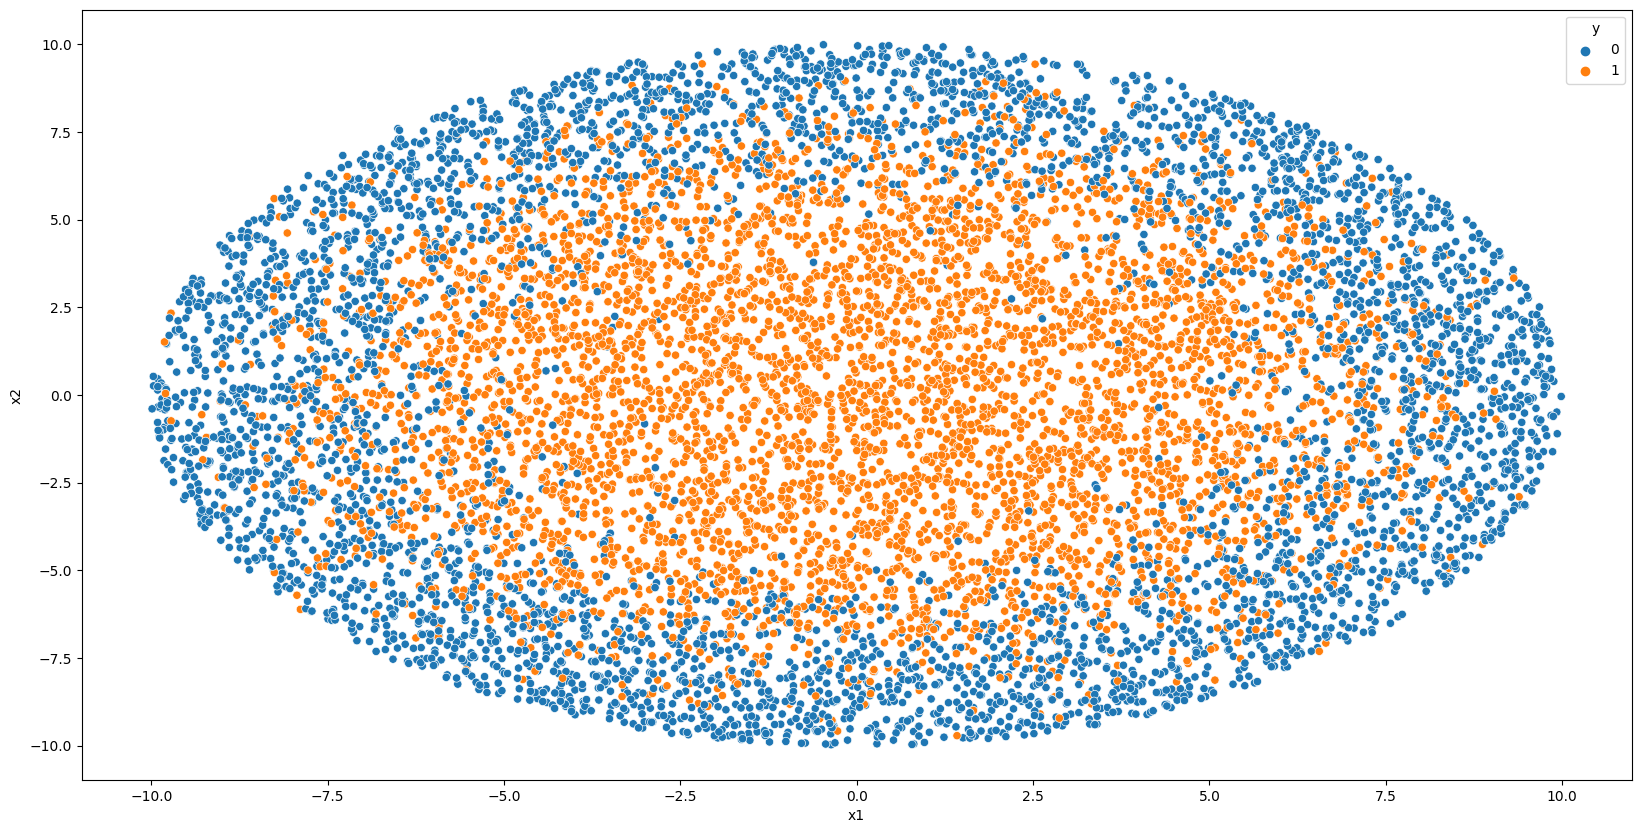

In [12]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data=df)

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

## **Делим на train и test**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# разобьем выборку на трейн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size=0.33)

## **Логистическая регрессия**

Посмотрим что нам даст Логистическая регрессия

Точность нашей модели 0.5824242424242424


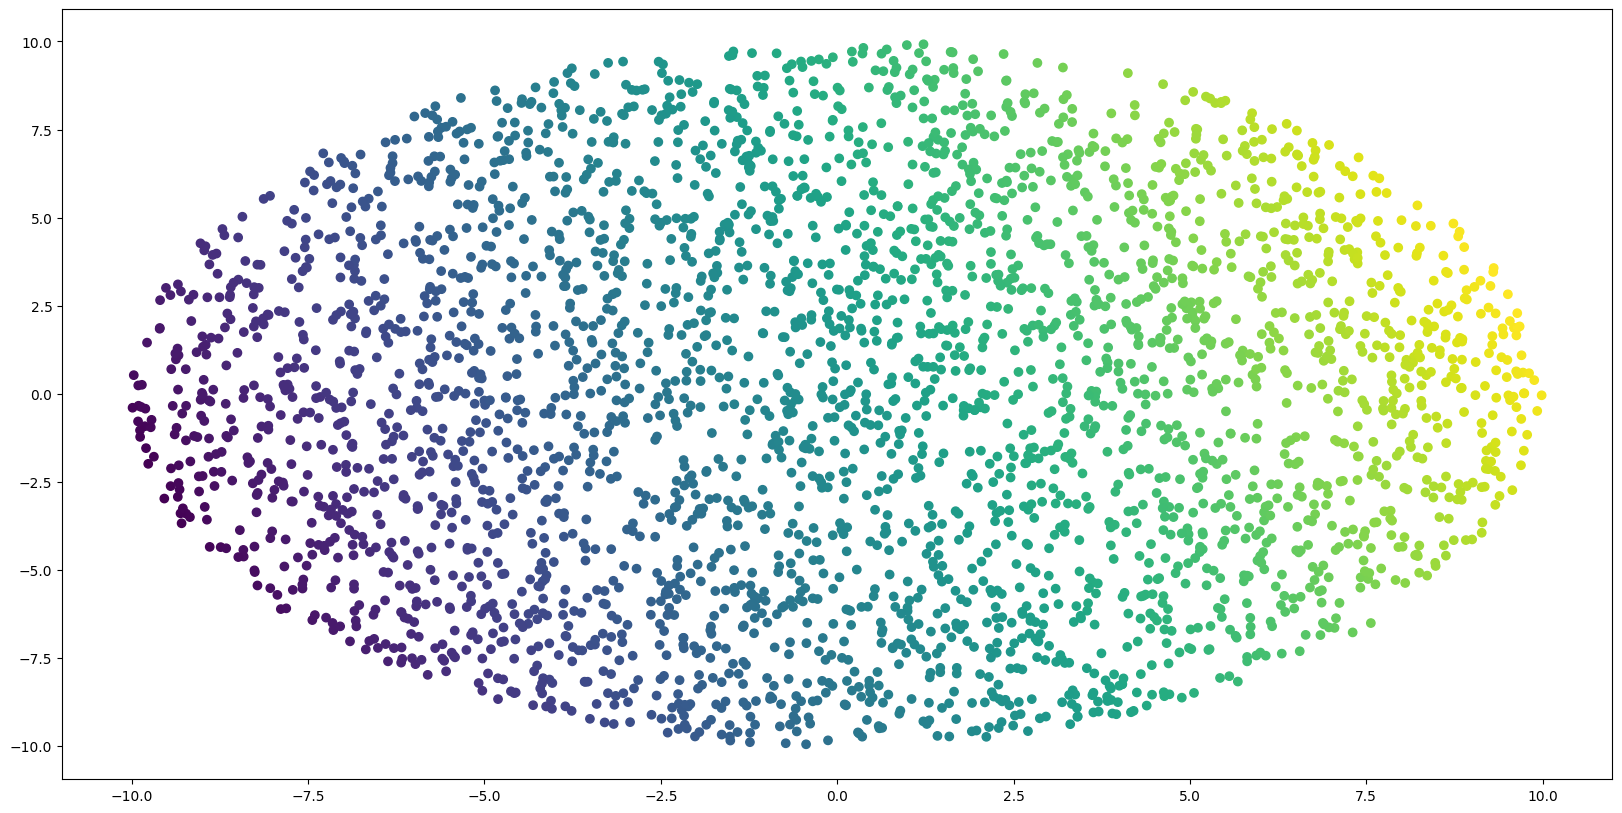

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from statistics import mean


#########################################
# Код для Логистической регрессии

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

predict_logit = ypred_test
y_pred_log_proba = model.predict_log_proba(X_test)
########################################


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')


# Визуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=y_pred_log_proba[:, 1:])
plt.show()

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

Точность нашей модели 0.833939393939394


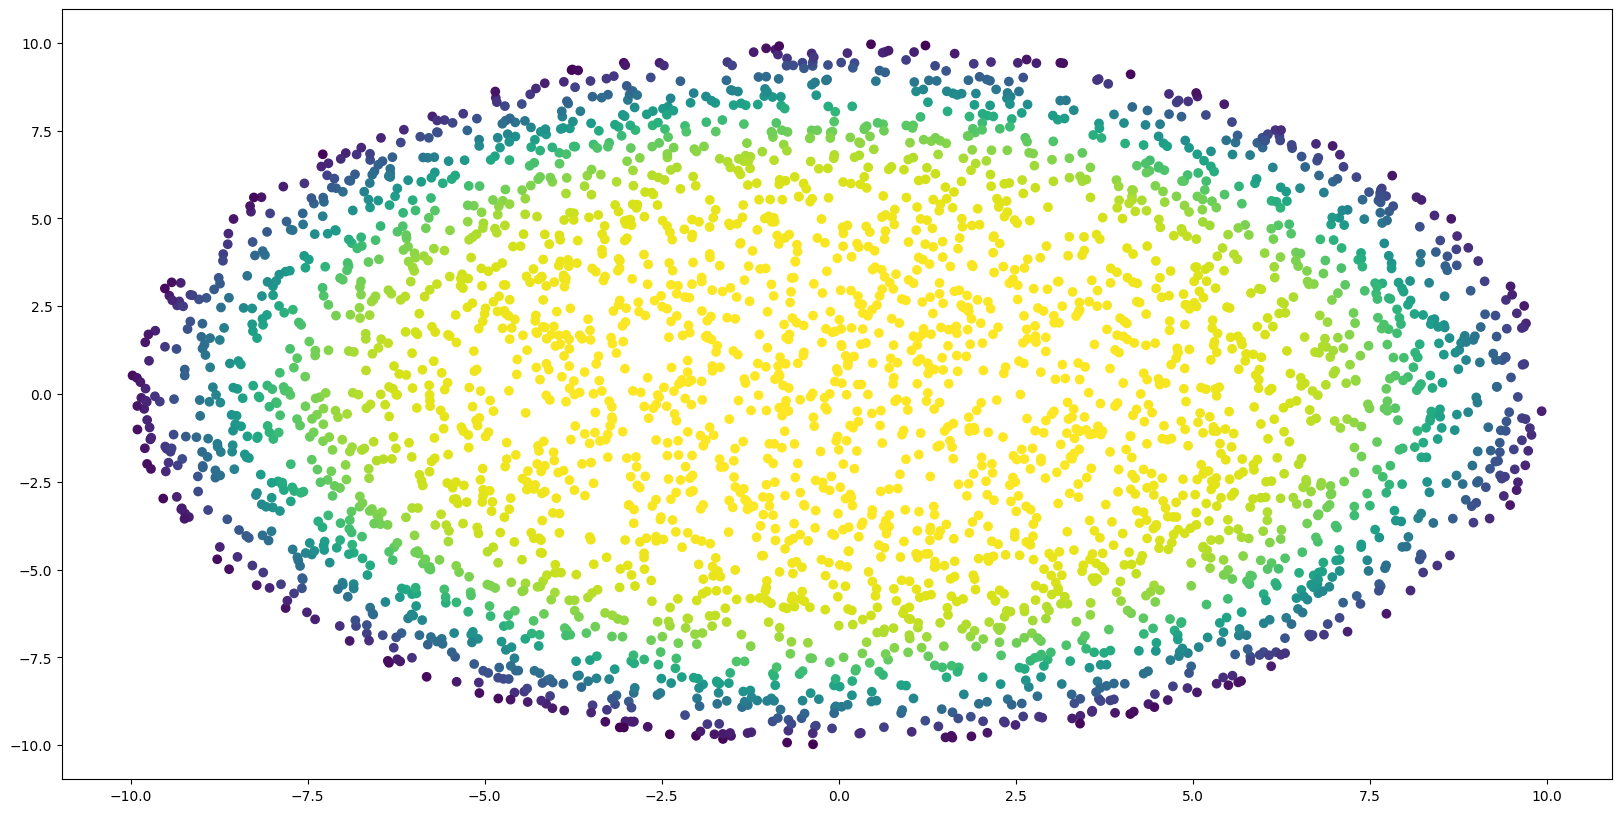

In [15]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# код для фичей и новой модели

df_new['x1^2'] = df_new['x1'] ** 2
df_new['x2^2'] = df_new['x2'] ** 2

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'x1^2', 'x2^2']],
                                                                    df_new['y'], test_size=0.33)

model_new = LogisticRegression(solver='liblinear')
model_new.fit(X_train_new, y_train_new)

ypred_train_new = model_new.predict(X_train_new)
ypred_test_new = model_new.predict(X_test_new)

predict_logit_new = ypred_test_new
predict_log_proba_new = model_new.predict_log_proba(X_test_new)

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit_new,y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c=predict_log_proba_new[:,1:])
plt.show()

## **Деревья решений**

Переходим к следующему классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение?

Decision tree accuracy: 0.77
Точность нашей модели 0.7654545454545455


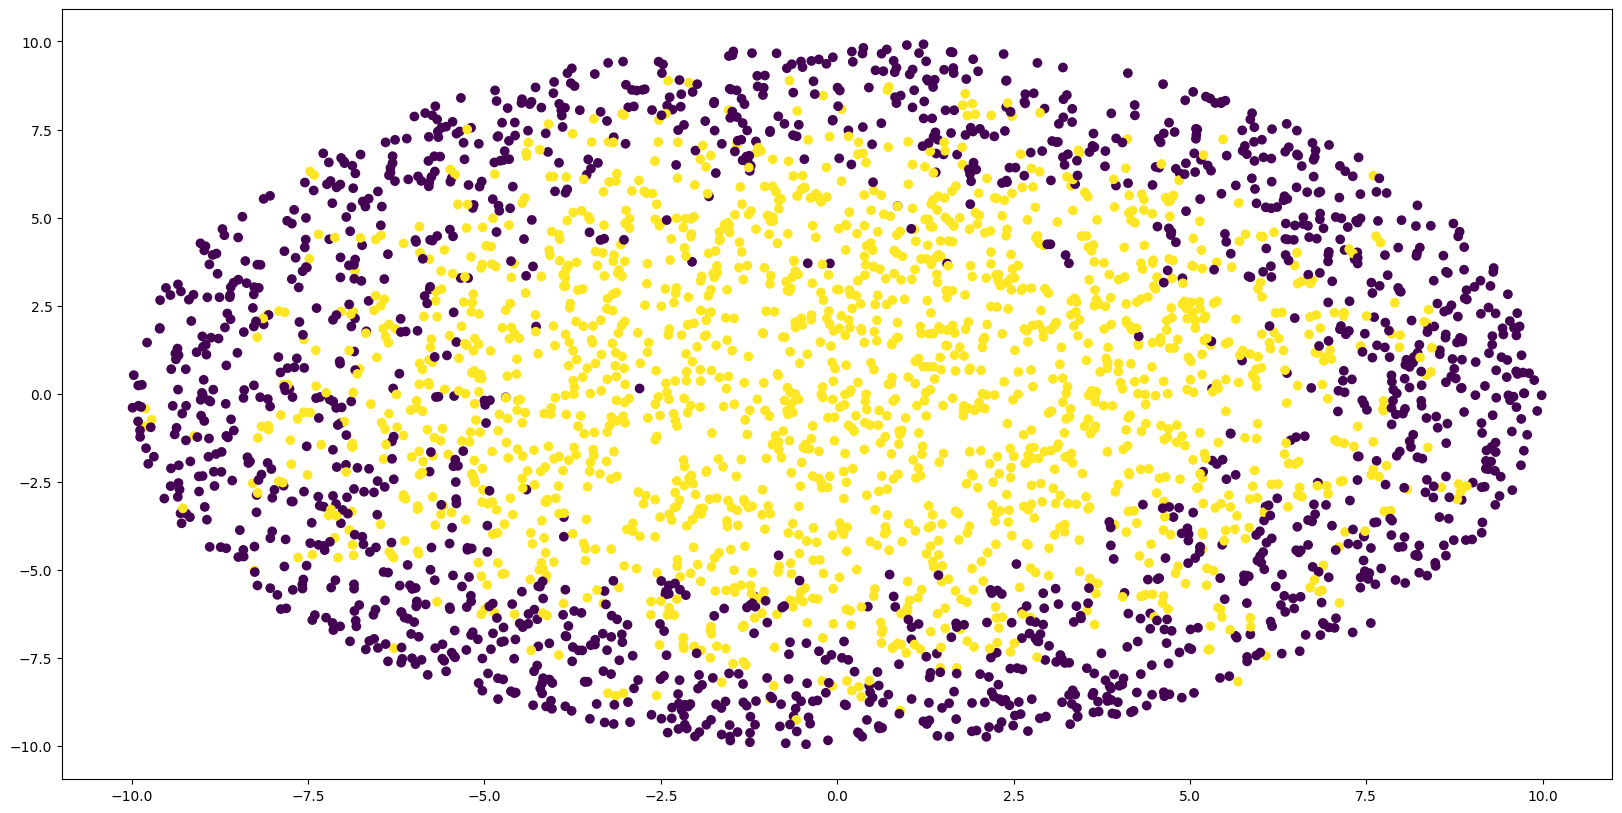

In [16]:
from sklearn.tree import DecisionTreeClassifier

#########################################
# Ваш код для деревьев решений
dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print(f"Decision tree accuracy: {accuracy_score(y_pred_dt, y_test):.2f}")

predict_tree = y_pred_dt
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = dt.predict_proba(X_test)

#########################################

plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c=predict_tree_proba[:, 1:])
plt.show()

## **Ансамбли**

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

Точность нашей модели 0.5018181818181818


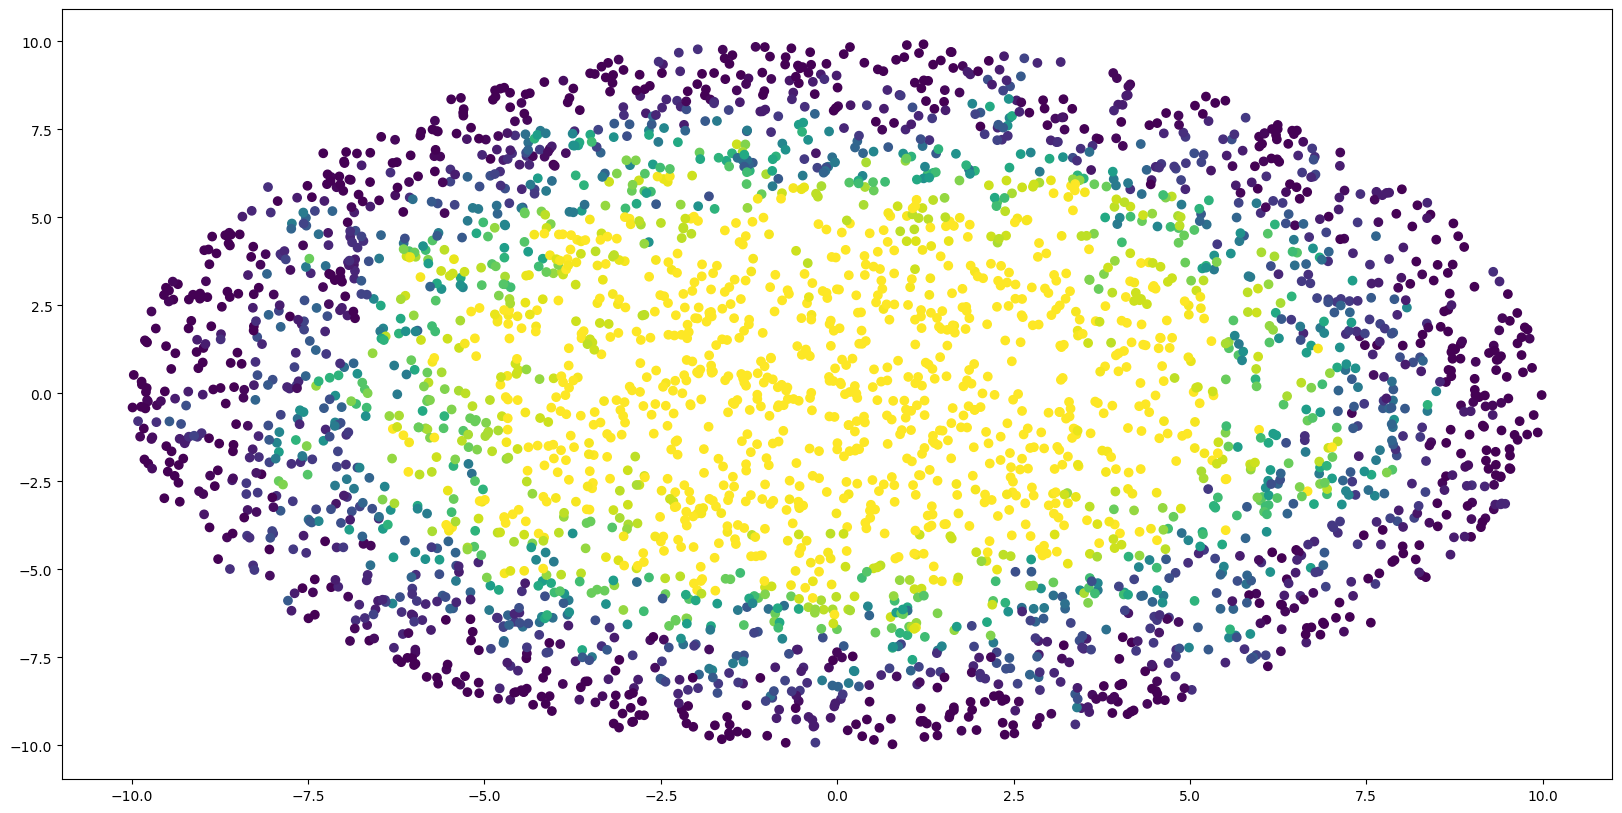

In [17]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#########################################
# код для ансамбля

base_learners = [
                 ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                 ('rf_2', KNeighborsClassifier(n_neighbors=5))
                ]

clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size=0.33)
clf.fit(X_train, y_train).score(X_test, y_test)

predict_forest = ypred_test
print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = clf.predict_proba(X_test)

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=predict_forest_proba[:, 1:])
plt.show()

# **Нейронная сеть**

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом.

In [18]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 11.4 MB/s eta 0:00:00


In [19]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils
import torchvision
from torchmetrics import Accuracy

from tqdm.notebook import tqdm

import math

In [29]:
device = torch.device("cpu")
device

device(type='cpu')

In [30]:
LEARNING_RATE = 1e-3
# EPOCHS = 30
EPOCHS = 150

In [31]:
class NN_Model(nn.Module):
    def __init__(self, in_features, out_features, hidden_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_size),
            nn.ReLU(),
            nn.Linear(in_features=hidden_size, out_features=out_features),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [32]:
model = NN_Model(2, 1, 5)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)
criterion = nn.BCELoss()

In [33]:
def create_data_loader(X_train, y_train, X_test, y_test):
    train_tensor = data_utils.TensorDataset(torch.from_numpy(X_train).to(torch.float32), torch.from_numpy(y_train.reshape(-1, 1)))
    train_loader = data_utils.DataLoader(dataset=train_tensor,
                                         batch_size=4,
                                         shuffle=True)

    test_tensor = data_utils.TensorDataset(torch.from_numpy(X_test).to(torch.float32), torch.from_numpy(y_test.reshape(-1, 1)))
    test_loader = data_utils.DataLoader(dataset=test_tensor,
                                        batch_size=4,
                                        shuffle=False)
    return train_loader, test_loader

In [34]:
train_loader, test_loader = create_data_loader(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())

In [35]:
train_loss_values = []
train_accuracy_values = []
valid_loss_values = []
valid_accuracy = []

In [36]:
def run_model(model, optimizer, criterion, train_loader, test_loader):

    """
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        test_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)

    """

    for epoch in range(EPOCHS):
        model.train()
        running_loss = 0
        running_acc = 0
        for features, label in tqdm(train_loader):
            features = features.to(device)
            label = label.to(torch.float32).to(device)

            # Reset gradients
            optimizer.zero_grad()

            output = model(features)

            # Calculate error and backpropagate
            loss = criterion(output, label)
            loss.backward()

            optimizer.step()

            running_loss += loss.item() * features.shape[0]


        train_loss_values.append(running_loss / len(train_loader.dataset))

        if epoch % 2 == 0:
            print(f'EPOCH {epoch}: train_loss: {train_loss_values[-1]}')

        model.eval()
        running_loss = 0
        running_acc = 0
        for features, label in test_loader:
            features = features.to(device)
            label = label.to(torch.float32).to(device)

            output = model(features)

            # Calculate error and backpropagate
            loss = criterion(output, label)
            with torch.no_grad():
                running_loss += loss.item() * features.shape[0]


        valid_loss_values.append(running_loss / len(test_loader.dataset))

        if epoch % 2 == 0:
              print(f'EPOCH {epoch}: valid_loss: {valid_loss_values[-1]}')

In [37]:
run_model(model, optimizer, criterion, train_loader, test_loader)

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 0: train_loss: 0.7143713687160121
EPOCH 0: valid_loss: 0.6787668133504463


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 2: train_loss: 0.6530036996371711
EPOCH 2: valid_loss: 0.6454185437072407


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 4: train_loss: 0.6248632562694265
EPOCH 4: valid_loss: 0.6211758773615866


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 6: train_loss: 0.600790224804807
EPOCH 6: valid_loss: 0.5973552618243477


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 8: train_loss: 0.5777552396503847
EPOCH 8: valid_loss: 0.575324780146281


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 10: train_loss: 0.5565944343716351
EPOCH 10: valid_loss: 0.5551436813672384


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 12: train_loss: 0.5372984827810259
EPOCH 12: valid_loss: 0.5367096971743035


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 14: train_loss: 0.5200249487784372
EPOCH 14: valid_loss: 0.52012082956054


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 16: train_loss: 0.504154005539951
EPOCH 16: valid_loss: 0.5048274164488822


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 18: train_loss: 0.48937189553210986
EPOCH 18: valid_loss: 0.49185533241792156


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 20: train_loss: 0.4764825128975199
EPOCH 20: valid_loss: 0.4805308364015637


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 22: train_loss: 0.46537120271084914
EPOCH 22: valid_loss: 0.4701873508547292


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 24: train_loss: 0.45577663925156664
EPOCH 24: valid_loss: 0.4609667384624481


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 26: train_loss: 0.44702230228416956
EPOCH 26: valid_loss: 0.45366319551612394


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 28: train_loss: 0.4394414052055843
EPOCH 28: valid_loss: 0.4463434873385863


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 30: train_loss: 0.43305719507719154
EPOCH 30: valid_loss: 0.4404890151457353


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 32: train_loss: 0.4272758766697414
EPOCH 32: valid_loss: 0.43568435423301927


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 34: train_loss: 0.4221791155525108
EPOCH 34: valid_loss: 0.4312554243658528


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 36: train_loss: 0.41759210901473887
EPOCH 36: valid_loss: 0.4266776677153327


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 38: train_loss: 0.41343528610556873
EPOCH 38: valid_loss: 0.42323535056728306


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 40: train_loss: 0.4095765631234468
EPOCH 40: valid_loss: 0.42097357909787786


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 42: train_loss: 0.40677120187834126
EPOCH 42: valid_loss: 0.41761762010328696


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 44: train_loss: 0.4035820039395076
EPOCH 44: valid_loss: 0.41508348068504625


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 46: train_loss: 0.4010747086957319
EPOCH 46: valid_loss: 0.4128615862402049


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 48: train_loss: 0.39896655542636983
EPOCH 48: valid_loss: 0.4106123372822097


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 50: train_loss: 0.3969917363506644
EPOCH 50: valid_loss: 0.40899062490824495


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 52: train_loss: 0.394953110173567
EPOCH 52: valid_loss: 0.4081208376180042


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 54: train_loss: 0.3932085343683834
EPOCH 54: valid_loss: 0.40574124789599214


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 56: train_loss: 0.3916902799748663
EPOCH 56: valid_loss: 0.40489070715777803


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 58: train_loss: 0.39021086016475265
EPOCH 58: valid_loss: 0.4026888813755729


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 60: train_loss: 0.3891675460694441
EPOCH 60: valid_loss: 0.4024834861719247


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 62: train_loss: 0.38765344468737717
EPOCH 62: valid_loss: 0.40079263680360533


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 64: train_loss: 0.3867795596505279
EPOCH 64: valid_loss: 0.3998426593749812


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 66: train_loss: 0.38554014137765363
EPOCH 66: valid_loss: 0.3986862628974698


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 68: train_loss: 0.3848997659981251
EPOCH 68: valid_loss: 0.3984912485967983


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 70: train_loss: 0.3833800745811035
EPOCH 70: valid_loss: 0.3976532131704417


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 72: train_loss: 0.38256199663254753
EPOCH 72: valid_loss: 0.39782352390162873


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 74: train_loss: 0.3819690835320238
EPOCH 74: valid_loss: 0.3954602063740745


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 76: train_loss: 0.38135782142406077
EPOCH 76: valid_loss: 0.3960894959352233


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 78: train_loss: 0.38049956699583065
EPOCH 78: valid_loss: 0.3979570291168762


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 80: train_loss: 0.37986472733207605
EPOCH 80: valid_loss: 0.39483316472533975


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 82: train_loss: 0.3795672876165429
EPOCH 82: valid_loss: 0.3933330431851474


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 84: train_loss: 0.37899528544562966
EPOCH 84: valid_loss: 0.39330425425912396


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 86: train_loss: 0.37844737634285175
EPOCH 86: valid_loss: 0.39295339460625794


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 88: train_loss: 0.3775081660698599
EPOCH 88: valid_loss: 0.3930018253172889


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 90: train_loss: 0.3773111455298182
EPOCH 90: valid_loss: 0.39238048658226476


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 92: train_loss: 0.37654163749805136
EPOCH 92: valid_loss: 0.39173465428930343


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 94: train_loss: 0.37636250514926306
EPOCH 94: valid_loss: 0.39124647399692825


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 96: train_loss: 0.3758416031440025
EPOCH 96: valid_loss: 0.39036699703697003


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 98: train_loss: 0.3753538699659394
EPOCH 98: valid_loss: 0.39022059376944196


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 100: train_loss: 0.374979426104631
EPOCH 100: valid_loss: 0.3910780742990248


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 102: train_loss: 0.3747448015374257
EPOCH 102: valid_loss: 0.3893517022873416


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 104: train_loss: 0.37421020716762365
EPOCH 104: valid_loss: 0.38975417757576164


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 106: train_loss: 0.3737213922458798
EPOCH 106: valid_loss: 0.38959964192274843


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 108: train_loss: 0.3733651596163191
EPOCH 108: valid_loss: 0.38945853727333474


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 110: train_loss: 0.37307731923105114
EPOCH 110: valid_loss: 0.38909249130072016


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 112: train_loss: 0.372574392757309
EPOCH 112: valid_loss: 0.3891451699264122


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 114: train_loss: 0.3726670345441619
EPOCH 114: valid_loss: 0.38707246027435316


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 116: train_loss: 0.37177701639928923
EPOCH 116: valid_loss: 0.38887245645125706


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 118: train_loss: 0.3720092081417566
EPOCH 118: valid_loss: 0.38688725651439393


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 120: train_loss: 0.37172201797477344
EPOCH 120: valid_loss: 0.3882008767240878


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 122: train_loss: 0.37141769727553003
EPOCH 122: valid_loss: 0.38646725637443136


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 124: train_loss: 0.37117701660563696
EPOCH 124: valid_loss: 0.3866565812130769


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 126: train_loss: 0.3706399785137888
EPOCH 126: valid_loss: 0.38733377106713524


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 128: train_loss: 0.3708060088653618
EPOCH 128: valid_loss: 0.38582930171128477


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 130: train_loss: 0.370044252582784
EPOCH 130: valid_loss: 0.3884101976973541


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 132: train_loss: 0.37006190602459127
EPOCH 132: valid_loss: 0.38760566103187477


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 134: train_loss: 0.3700548098914659
EPOCH 134: valid_loss: 0.3858320639575973


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 136: train_loss: 0.3694609707516076
EPOCH 136: valid_loss: 0.3859324346121513


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 138: train_loss: 0.36918534250735346
EPOCH 138: valid_loss: 0.3862724125362707


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 140: train_loss: 0.36924171719533294
EPOCH 140: valid_loss: 0.3849096482201959


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 142: train_loss: 0.36895762429975754
EPOCH 142: valid_loss: 0.3861067155139013


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 144: train_loss: 0.3690794700539824
EPOCH 144: valid_loss: 0.3853918267109177


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 146: train_loss: 0.3686632982863864
EPOCH 146: valid_loss: 0.3844217203083363


  0%|          | 0/1675 [00:00<?, ?it/s]

  0%|          | 0/1675 [00:00<?, ?it/s]

EPOCH 148: train_loss: 0.3683893689279681
EPOCH 148: valid_loss: 0.38549178374761883


  0%|          | 0/1675 [00:00<?, ?it/s]

In [38]:
with torch.no_grad():
    test_scores = model(torch.tensor(X_test.to_numpy().astype(np.float32)))

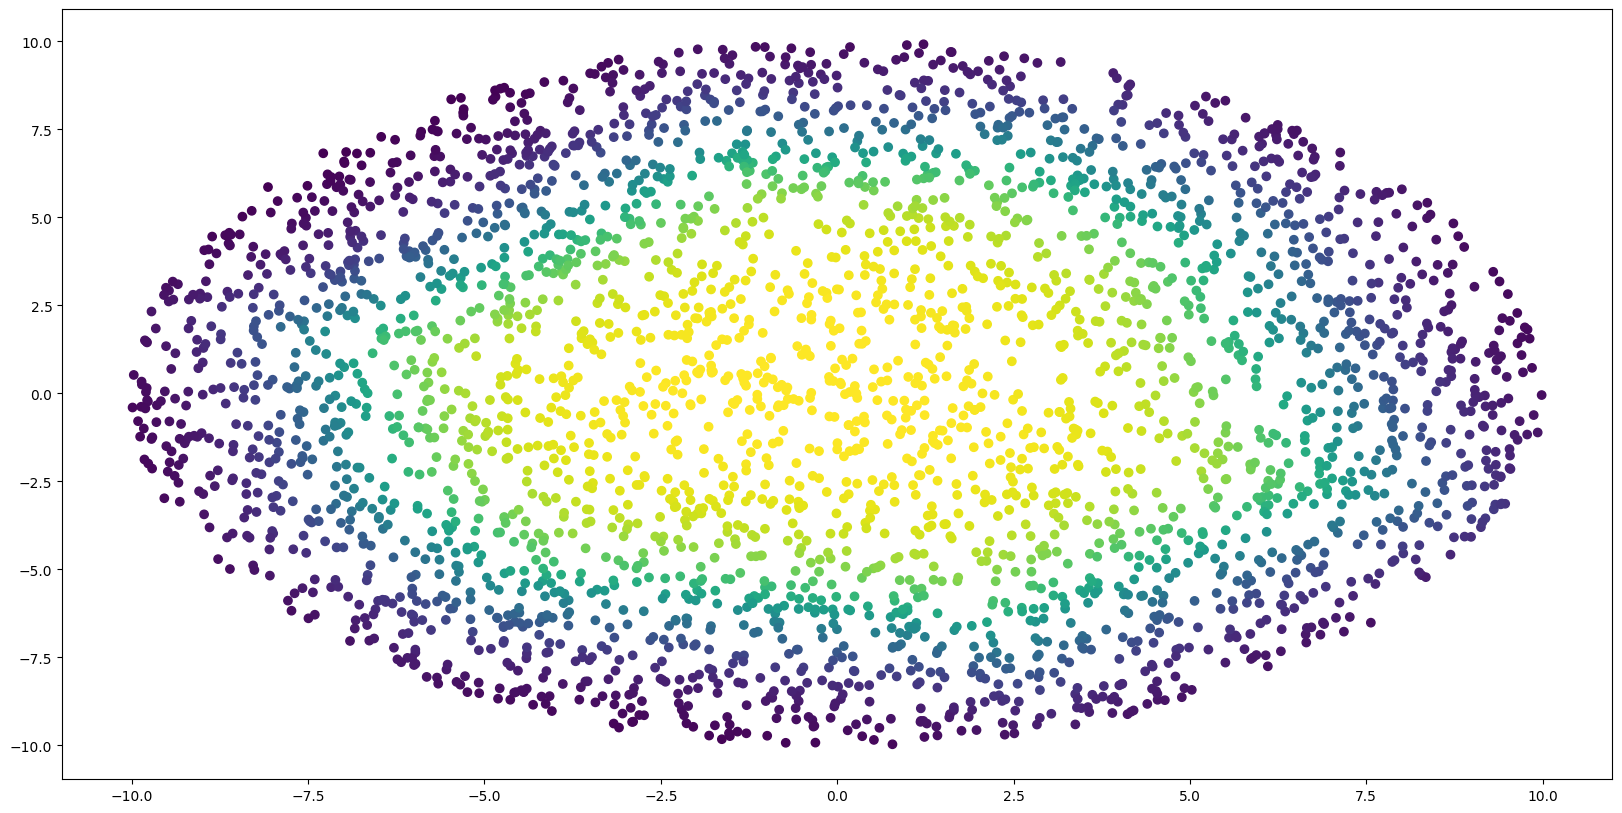

In [39]:
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c=test_scores)
plt.show()